# Thermoelectric Transport Properties

Here code examples for thermoelectric transport properties are given. It is developed for the 'BOLTZTRA' keyword of CRYSTAL properties calculation.

## The 'read_transport()' method

This method is defined in the `crystal_io.Properties_output` class, which reads the 'DAT' formatted files ('KAPPA.DAT', 'SIGMA.DAT', 'SIGMAS.DAT', 'SEEBECK.DAT' and 'TDF.DAT') generated by CRYSTAL and return to `transport.Tensor` ('KAPPA', 'SIGMA', 'SIGMAS' and 'SEEBECK') or `transport.Distribution` ('TDF') classes.

Currently the standard output is not required for plotting. But its geometry information will be saved if given.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output

obj = Properties_output('trans_G2S.out').read_transport('trans_G2S_SK.DAT')
print('Object type: {}'.format(obj.type))
print('Temperature (K):')
print(obj.T)
print('Chemical Potential (eV):')
print(obj.mu)
print('Geometry:')
print(obj.struc)

Object type: SEEBECK
Temperature (K):
[300. 310. 320. 330. 340. 350. 360. 370. 380. 390. 400. 410. 420. 430.
 440. 450. 460. 470. 480. 490. 500.]
Chemical Potential (eV):
[-4.84 -4.74 -4.64 -4.54 -4.44 -4.34 -4.24 -4.14 -4.04 -3.94 -3.84 -3.74
 -3.64 -3.54 -3.44 -3.34 -3.24 -3.14 -3.04 -2.94 -2.84 -2.74 -2.64 -2.54
 -2.44 -2.34 -2.24 -2.14 -2.04 -1.94 -1.84]
Geometry:
Full Formula (C48 S2)
Reduced Formula: C24S
abc   :  12.251302  12.223170 500.000000
angles:  90.000000  90.000000 119.924043
pbc   :       True       True       True
Sites (50)
  #  SP            a          b          c
---  ----  ---------  ---------  ---------
  0  C     -0.130438   0.133993   0.000898
  1  C     -0.133358   0.332481  -5.6e-05
  2  C     -0.133358  -0.465839  -5.6e-05
  3  C     -0.130438  -0.264431   0.000898
  4  C      0.072706  -0.066403   0.000264
  5  C      0.072706   0.139109   0.000264
  6  C      0.065737   0.332463  -0.00028
  7  C      0.065737  -0.467165  -0.000416
  8  C      0.065737  -0

## The 'transport' module

Currently 2 classes are defined in this module, including `transport.Tensor` for 'tensor-like' thermoelectric properties including 'KAPPA', 'SIGMA', 'SIGMAS' and 'SEEBECK', and `transport.Distribution` for distribution functions.

### The 'Tensor' class

Basic I/O with the `from_file` class method.

In [2]:
from CRYSTALpytools.transport import Tensor

obj = Tensor.from_file('trans_G2S_SG.DAT')
print('Object type: {}'.format(obj.type))

Object type: SIGMA


By setting `method='power factor'`, the user can get 'POWERFACTOR' type ($S^{2}\sigma$) from 2 arbitrary types in 'SIGMA', 'SIGMAS' and 'SEEBECK'. The sequence is arbitrary.

In [1]:
from CRYSTALpytools.transport import Tensor

obj = Tensor.from_file('trans_G2S_SG.DAT', 'trans_G2S_SGS.DAT',
                       method='power factor', output='trans_G2S.out')
print('Object type: {}'.format(obj.type))
print('Object unit: {}'.format(obj.unit))

Object type: POWERFACTOR
Object unit: W/m/K^2


Similarly, with `method='zt'` the user can get 'ZT' type (thermoelectric dimensionless figure of merit, $\frac{S^{2}\sigma T}{\kappa}$) from 1 'KAPPA' type file and 2 arbitrary ones from 'SIGMA', 'SIGMAS' and 'SEEBECK'. The sequence is arbitrary.

In [2]:
from CRYSTALpytools.transport import Tensor

obj = Tensor.from_file('trans_G2S_SG.DAT', 'trans_G2S_SGS.DAT', 'trans_G2S_K.DAT',
                       method='zt', output='trans_G2S.out')
print('Object type: {}'.format(obj.type))
print('Object unit: {}'.format(obj.unit))

Object type: ZT
Object unit: dimensionless


With the `plot()` method one can visualize object. By defult it plots the property along the 'xx' direction as the function of chemical potential $\mu$. In that case, multiple data at different temperatures can be plotted as 'series'.

Specifing the temperature values by `plot_series`.

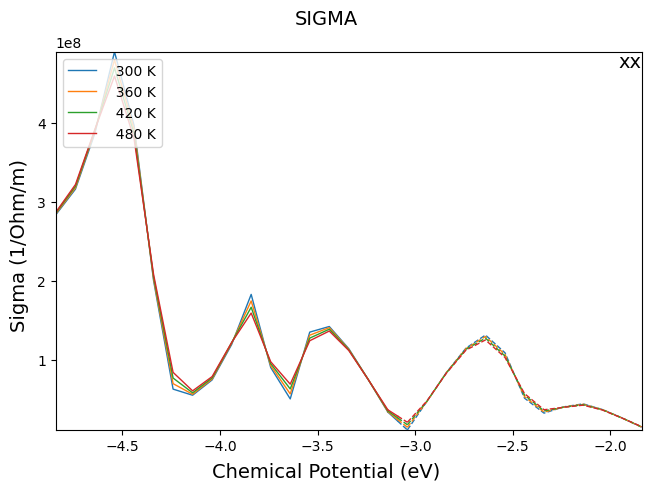

In [19]:
from CRYSTALpytools.transport import Tensor

obj = Tensor.from_file('trans_G2S_SG.DAT')
fig = obj.plot(plot_series=[300, 360, 420, 480])

The logic of setting plot parameters is similar to density plots (see examples of `electronics.ElectronDOS`), which is not repeated again here.

With `x_axis='carrier'`, the user can plot data as function of carrier densities. Temperature is also used as plot series. `direction=['xx', 'yy']` plots tensor properties along different directions into different subplots.

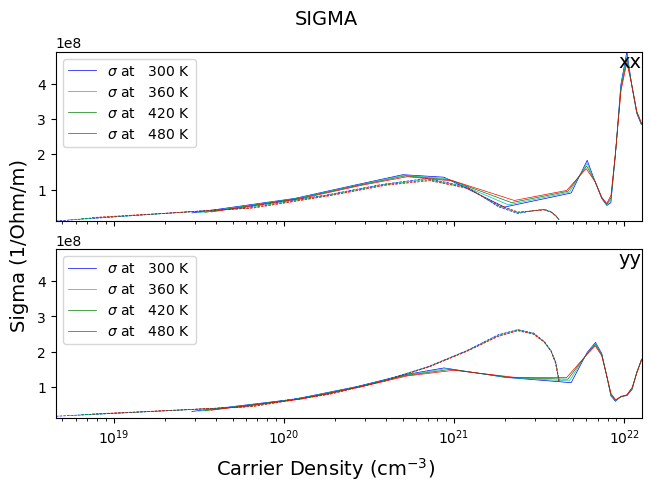

In [20]:
fig = obj.plot(x_axis='carrier', plot_series=[300, 360, 420, 480],
               direction=['xx', 'yy'], plot_label=r'$\sigma$ at',
               plot_linewidth=0.5, plot_color=['b', 'c', 'g', 'r'])

`x_axis='temperature'` plots the property as the function of temperature. Correspondingly, the plot series becomes chemical potential.

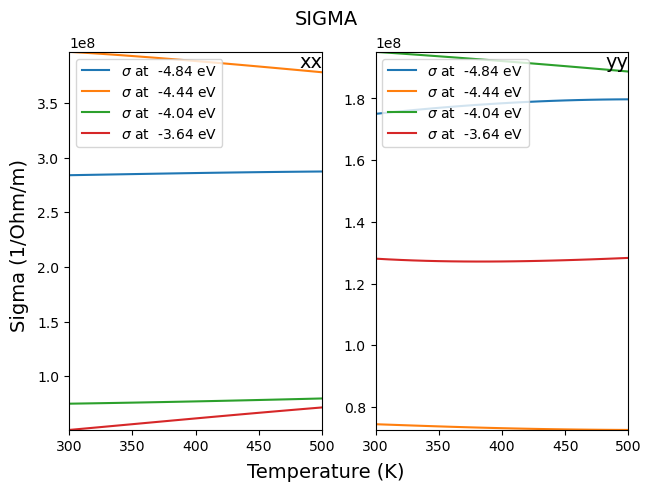

In [30]:
fig = obj.plot(x_axis='temperature', plot_label=r'$\sigma$ at',
               direction=['xx', 'yy'], layout=[1,2], sharey=False,
               plot_linewidth=1.5, plot_series=[-4.84, -4.44, -4.04, -3.64])

### The 'Distribution' class

Currently only the I/O method is defined for this class.

In [1]:
from CRYSTALpytools.transport import Distribution

obj = Distribution.from_file('trans_G2S_TDF.DAT', output='trans_G2S.out')
print('Object type: {}'.format(obj.type))
print('Object unit: {}'.format(obj.unit))

Object type: TDF
Object unit: 1/hbar^2*eV*fs/angstrom


## The 'plot_transport_tensor()' method

The `plot.plot_transport_tensor()` method is designed for multi-system plots of tensor-like properties. It can also be used as a shortcut to plot data from file just as the `Tensor.plot` method.

Normal usage with `option='normal'`.

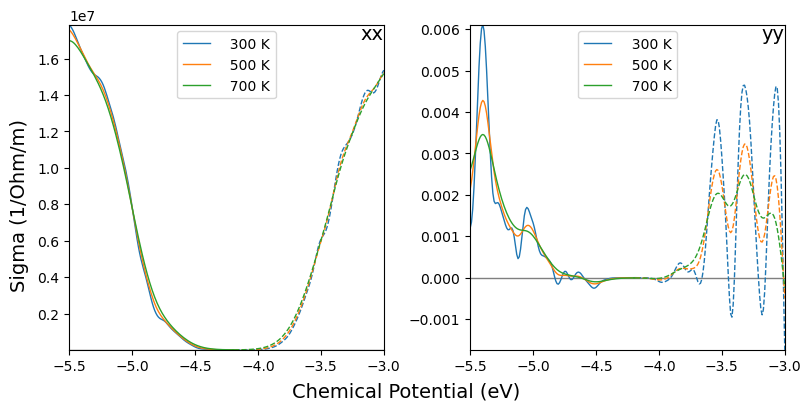

In [1]:
from CRYSTALpytools.plot import plot_transport_tensor

fig = plot_transport_tensor('trans_Bi2Te3_SG.DAT', x_range=[-5.5, -3],
                            direction=['xx', 'yy'], figsize=[8, 4],
                            layout=[1, 2], sharey=False, legend='upper center')

Get power factor with `option='power factor'`.

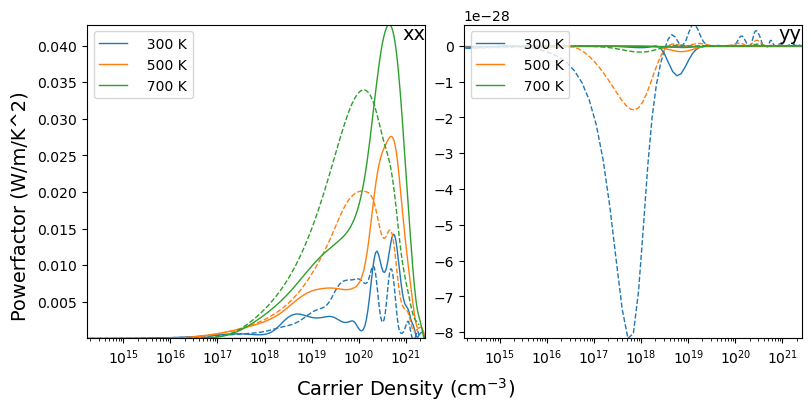

In [2]:
from CRYSTALpytools.plot import plot_transport_tensor

fig = plot_transport_tensor('trans_Bi2Te3_SG.DAT', 'trans_Bi2Te3_SK.DAT',
                            option='power factor', x_axis='carrier',
                            direction=['xx', 'yy'], figsize=[8, 4],
                            layout=[1, 2], sharey=False)

Compare data of 2 different materials with `option='multi'`.

**NOTE**

1. The entries must be of the same type, same dimensionality.  
2. Multi-direction plotting is disabled. `direction` only accepts string input.  
3. Instead, `plot_series` is used to generate subplots.  
4. This function accepts inconsistent plot series. The common plot series is found automatically. See the example below.

With `x_axis='potential'`, temperature is used as plot series.

Obj1 Temperature:
[300. 400. 500. 600. 700.]
Obj2 Temperature:
[300. 500. 700.]


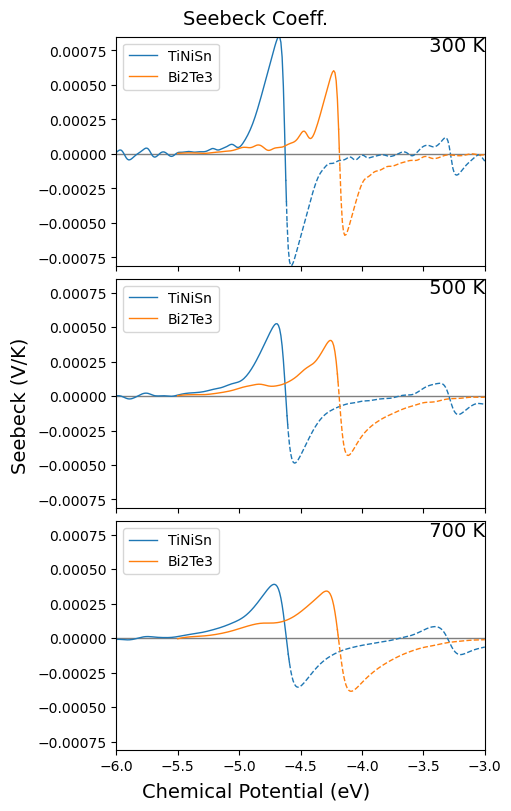

In [1]:
from CRYSTALpytools.transport import Tensor
from CRYSTALpytools.plot import plot_transport_tensor

obj1 = Tensor.from_file('trans_TiNiSn_SK.DAT')
obj2 = Tensor.from_file('trans_Bi2Te3_SK.DAT')

print('Obj1 Temperature:')
print(obj1.T)
print('Obj2 Temperature:')
print(obj2.T)

fig = plot_transport_tensor(obj1, obj2, option='multi', x_axis='potential',
                            plot_label=['TiNiSn', 'Bi2Te3'], title='Seebeck Coeff.',
                            direction='xx', figsize=[5, 8], x_range=[-6, -3])

For more details please refer to the module-specific documentations.